<a href="https://colab.research.google.com/github/amballa-mahesh/Deep_learning_fashion_mnist/blob/main/Deep_learning_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow

In [2]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
dic = {0:'T-shirt/top',
       1:'Trouser',
       2:'Pullover',
       3: 'Dress',
       4:'Coat',
       5:'Sandal',
       6:'Shirt',
       7:'Sneaker',
       8:'Bag',
       9:'Ankle boot'}

In [5]:
import matplotlib.pyplot as plt

In [6]:
x_train.shape

(60000, 28, 28)

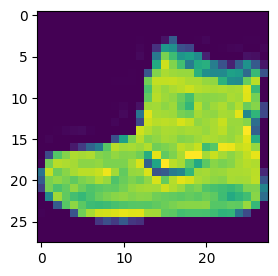

Ankle boot


In [7]:
plt.figure(figsize = (3,3))
plt.imshow(x_train[0])
plt.show()
print(dic[y_train[0]])

In [8]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [9]:
x_train = x_train.reshape(60000,28*28)
x_test  = x_test.reshape(10000,28*28)
x_train = x_train/255
x_test  = x_test/255

In [10]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [11]:
y_train = tensorflow.keras.utils.to_categorical(y_train)
y_test  = tensorflow.keras.utils.to_categorical(y_test)

In [12]:
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [14]:
model = Sequential()
model.add(Dense(784, activation = 'leaky_relu',input_shape = [x_train.shape[1],]))

model.add(Dense(20, activation = 'leaky_relu'))
model.add(Dropout(rate= 0.2))

model.add(Dense(15, activation = 'leaky_relu'))
model.add(Dropout(rate= 0.2))

model.add(Dense(10, activation = 'softmax'))


In [15]:
model.compile(optimizer ='adam',
              loss= 'categorical_crossentropy',
              metrics = 'accuracy')

In [16]:
model.fit(x_train, y_train, epochs =50, validation_data = (x_test,y_test),batch_size = 64)

Epoch 1/50
938/938 [==============================] - 10s 5ms/step - loss: 0.7645 - accuracy: 0.7409 - val_loss: 0.4747 - val_accuracy: 0.8337
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.5203 - accuracy: 0.8199 - val_loss: 0.4212 - val_accuracy: 0.8465
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 0.4590 - accuracy: 0.8418 - val_loss: 0.4137 - val_accuracy: 0.8512
Epoch 4/50
938/938 [==============================] - 4s 5ms/step - loss: 0.4310 - accuracy: 0.8525 - val_loss: 0.4277 - val_accuracy: 0.8455
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 0.4089 - accuracy: 0.8575 - val_loss: 0.3834 - val_accuracy: 0.8635
Epoch 6/50
938/938 [==============================] - 4s 4ms/step - loss: 0.3887 - accuracy: 0.8637 - val_loss: 0.3815 - val_accuracy: 0.8622
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 0.3823 - accuracy: 0.8670 - val_loss: 0.4056 - val_accuracy: 0.8614
Epoch

In [17]:
y_pred = model.predict(x_test).round()

313/313 [==============================] - 1s 2ms/step


In [18]:
from sklearn.metrics import classification_report,accuracy_score,multilabel_confusion_matrix

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.94      0.82      1000
           1       0.99      0.98      0.99      1000
           2       0.81      0.84      0.82      1000
           3       0.92      0.88      0.90      1000
           4       0.85      0.77      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.88      0.47      0.61      1000
           7       0.97      0.93      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.93      0.98      0.95      1000

   micro avg       0.90      0.87      0.88     10000
   macro avg       0.90      0.87      0.88     10000
weighted avg       0.90      0.87      0.88     10000
 samples avg       0.87      0.87      0.87     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
print(accuracy_score(y_test,y_pred))

0.8725


In [23]:
l1 = list(dic.values())
l1

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [35]:
print(multilabel_confusion_matrix(y_test,y_pred))

[[[8640  360]
  [  57  943]]

 [[8991    9]
  [  20  980]]

 [[8805  195]
  [ 164  836]]

 [[8926   74]
  [ 122  878]]

 [[8860  140]
  [ 228  772]]

 [[8977   23]
  [  39  961]]

 [[8933   67]
  [ 528  472]]

 [[8969   31]
  [  69  931]]

 [[8977   23]
  [  26  974]]

 [[8921   79]
  [  22  978]]]


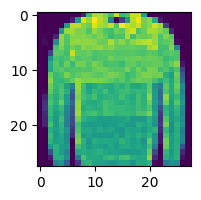

Pullover 



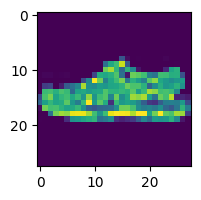

Sandal 



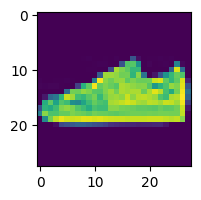

Sneaker 



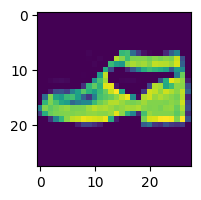

Sandal 



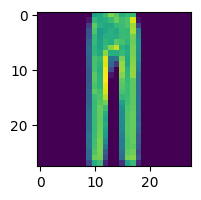

Trouser 



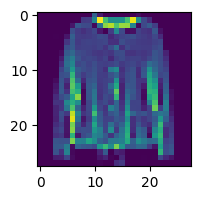

Pullover 



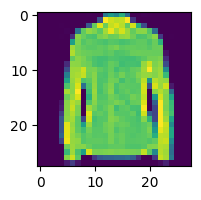

Shirt 



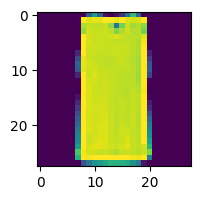

T-shirt/top 



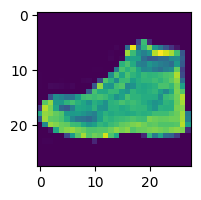

Ankle boot 



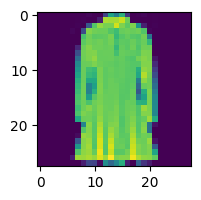

T-shirt/top 



In [22]:
for i in range (20,30):
  plt.figure(figsize = (2,2))
  plt.imshow(x_test[i].reshape(28,28))
  plt.show()
  print(dic[np.argmax(y_pred[i])],'\n')